In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

How did Steve Nash make his teammates better ie there are measurements on how his teammates perform when he plays vs doesnt but thsi is insanely noisy, I chose linear regression for this to see coreelation when they play with and without him.

data: https://www.pbpstats.com/on-off/nba/player?Season=2004-05,2005-06&SeasonType=Regular%2BSeason&TeamId=1610612756&PlayerId=959

In [3]:
def normalising_mins(m1, m2, wo): #Normalise the minutes data getting it as a ratio, then factor in how much 
    mins_ = pd.Series(zip(m1, m2))
    min_ret = []
    for m in mins_:
        min_ret.append(m[wo]/(2*48*82))
    return min_ret

def scoring_val(ts, pts, ots, opts): #trying to kinda make a metric on how much their efficiency n scoring volume changes the more they play with Nash
    dif = []
    wn = []
    wo = []
    t1 = zip(ts, pts)
    t2 = zip(ots, opts)
    for _ in t1:
        wn.append(_[0]*_[1])
    for _ in t2:
        wo.append(_[0]*_[1])
    for i in range(len(wn)):
        dif.append(wn[i]-wo[i])
    return wn, wo, np.array(dif)

In [4]:
data = pd.read_csv("Nash_TS.csv")
#filter out anyone who plays lss than 300 minutes with Steve Nash as that is purely noise
data["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"] = data[data[["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]] > 300]["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]
data = data.dropna()

min1 = data["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]
min2 = data["Minutes without Steve Nash Sort table by Minutes without Steve Nash in descending order"]

min_w = normalising_mins(min1, min2, 0)
min_o = normalising_mins(min1, min2, 1)

nash_pm = data["Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order"]
data

,Player Sort table by Player in descending order,Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order,Minutes without Steve Nash Sort table by Minutes without Steve Nash in descending order,Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order,Stat Value without Steve Nash Sort table by Stat Value without Steve Nash in descending order,Difference Sort table by Difference in descending order
1,Jim Jackson,609.0,811,0.543,0.477,0.07
3,Shawn Marion,4854.0,1553,0.572,0.572,0.00
4,Quentin Richardson,2031.0,814,0.534,0.493,0.04
6,Joe Johnson,2185.0,1053,0.592,0.492,0.10
7,Steven Hunter,493.0,558,0.620,0.553,0.07
9,Amar'e Stoudemire,2116.0,819,0.628,0.576,0.05
13,Leandro Barbosa,921.0,1756,0.624,0.562,0.06
18,Kurt Thomas,1228.0,183,0.542,0.375,0.17
19,Tim Thomas,333.0,300,0.592,0.472,0.12
20,Raja Bell,2460.0,499,0.571,0.639,-0.07


correlation: -0.4147938242330344
Goodness r^2 of model: 0.17205391662186553


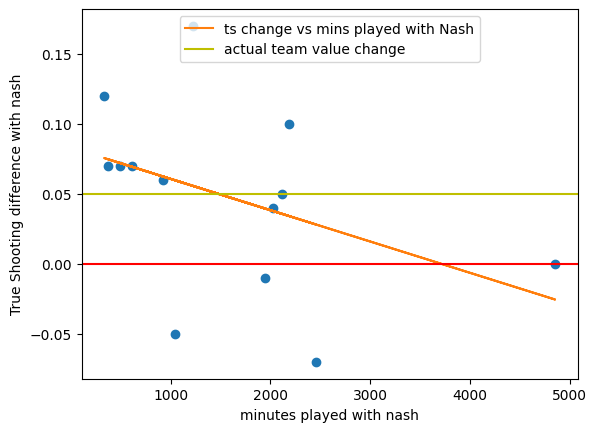

In [5]:
#measure the trend of Nash's teamates change in shooting efficiency scaled with 

nash_dif = data["Difference Sort table by Difference in descending order"]
plt.plot(min1, nash_dif, 'o')
plt.xlabel("minutes played with nash")
plt.ylabel("True Shooting difference with nash")
slope, intercept, r, p, std_err = stats.linregress(min1, nash_dif)

def f(x):
  return slope * x + intercept

mymodel = list(map(f, min1))

coefficient_of_dermination = r2_score(nash_dif, mymodel)

plt.plot(min1, mymodel, label="ts change vs mins played with Nash")
plt.axhline(0.05, c='y', label="actual team value change")
plt.legend(loc='upper center')
print("correlation:", r)
print("Goodness r^2 of model:", coefficient_of_dermination)
plt.axhline(0, c='r')
#this is insanely noisy cause a player can play a lot of minutes with him and a few without but have a neative difference

correlation: -0.04253207344748985
Goodness r^2 of model: 0.0018089772717425623


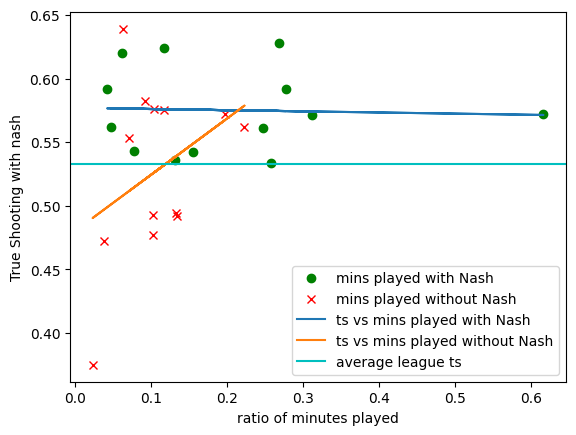

In [6]:
nash_w = data["Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order"]

plt.plot(min_w, nash_w, 'o', c='g', label="mins played with Nash")

plt.xlabel("ratio of minutes played")
plt.ylabel("True Shooting with nash")
slope, intercept, r, p, std_err = stats.linregress(min_w, nash_w)

def f(x):
  return slope * x + intercept

nash_o = data["Stat Value without Steve Nash Sort table by Stat Value without Steve Nash in descending order"]

plt.plot(min_o, nash_o, 'x', c='r', label="mins played without Nash")

slope1, intercept1, r1, p1, std_err1 = stats.linregress(min_o, nash_o)

def f1(x):
  return slope1 * x + intercept1

mymodel = list(map(f, min_w))

mymodel1 = list(map(f1, min_o))

coefficient_of_dermination = r2_score(nash_w, mymodel)

plt.plot(min_w, mymodel, label="ts vs mins played with Nash")
plt.plot(min_o, mymodel1, label="ts vs mins played without Nash")

plt.axhline((0.536+0.529)/2, label="average league ts", c='c')
plt.legend(loc='lower right')
print("correlation:", r)
print("Goodness r^2 of model:", coefficient_of_dermination)

In [7]:
#rename column for merging different values/stats and clean data

data.rename(columns={"Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order": "TS with nash"}, inplace=True)
data.rename(columns={"Stat Value without Steve Nash Sort table by Stat Value without Steve Nash in descending order": "TS without nash"}, inplace=True)
data.rename(columns={"Difference Sort table by Difference in descending order":"TS difference"}, inplace=True)


data2 = pd.read_csv("nash_points.csv")
data1 = pd.read_csv("Nash_shot.csv")
data1["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"] = data1[data1[["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]] > 300]["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]
data2["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"] = data2[data2[["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]] > 300]["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]
data1.rename(columns={"Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order": "shot quality with nash"}, inplace=True)
data1.rename(columns={"Stat Value without Steve Nash Sort table by Stat Value without Steve Nash in descending order": "shot quality without nash"}, inplace=True)
data1.rename(columns={"Difference Sort table by Difference in descending order":"shot quality difference"}, inplace=True)
data1 = data1.dropna()
data2 = data2.dropna()

data2.rename(columns={"Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order": "points with nash"}, inplace=True)
data2.rename(columns={"Stat Value without Steve Nash Sort table by Stat Value without Steve Nash in descending order": "points without nash"}, inplace=True)
data2.rename(columns={"Difference Sort table by Difference in descending order":"points difference"}, inplace=True)


In [8]:
data_merged = pd.merge(data1, data2, how='outer')
data_merged = pd.merge(data_merged, data, how='outer')
data_merged.rename(columns={"Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order":"mins with Nash"}, inplace=True)
data_merged.rename(columns={"Minutes without Steve Nash Sort table by Minutes without Steve Nash in descending order":"mins without Nash"}, inplace=True)
data_merged

,Player Sort table by Player in descending order,mins with Nash,mins without Nash,shot quality with nash,shot quality without nash,shot quality difference,points with nash,points without nash,points difference,TS with nash,TS without nash,TS difference
0,Amar'e Stoudemire,2116.0,819,0.505,0.465,0.04,36.152,35.239,0.91,0.628,0.576,0.05
1,Boris Diaw,1946.0,928,0.484,0.485,0.00,19.686,17.183,2.50,0.561,0.575,-0.01
2,Eddie House,374.0,1047,0.494,0.476,0.02,29.581,27.576,2.01,0.562,0.494,0.07
3,James Jones,1040.0,731,0.499,0.488,0.01,19.409,20.180,-0.77,0.536,0.582,-0.05
4,Jim Jackson,609.0,811,0.510,0.475,0.04,16.327,15.203,1.12,0.543,0.477,0.07
5,Joe Johnson,2185.0,1053,0.503,0.458,0.05,21.207,22.153,-0.95,0.592,0.492,0.10
6,Kurt Thomas,1228.0,183,0.458,0.454,0.00,17.288,9.456,7.83,0.542,0.375,0.17
7,Leandro Barbosa,921.0,1756,0.558,0.533,0.03,22.151,21.926,0.22,0.624,0.562,0.06
8,Quentin Richardson,2031.0,814,0.548,0.513,0.04,20.073,21.710,-1.64,0.534,0.493,0.04
9,Raja Bell,2460.0,499,0.502,0.479,0.02,19.841,19.381,0.46,0.571,0.639,-0.07


correlation: 0.1161111871701799
Goodness r^2 of model: 0.013481807786068556


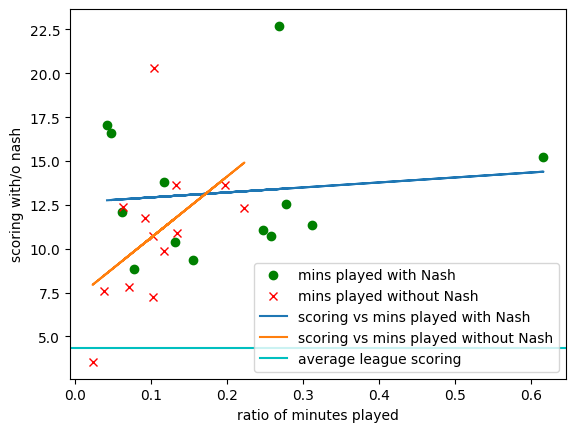

In [9]:
WN, WO, DIF = scoring_val(data_merged["points with nash"], data_merged["TS with nash"],
           data_merged["points without nash"], data_merged["TS without nash"])

min1 = data_merged["mins with Nash"]
min2 = data_merged["mins without Nash"]

min_w = normalising_mins(min1, min2, 0)

min_o = normalising_mins(min1, min2, 1)


plt.plot(min_w, WN, 'o', c='g', label="mins played with Nash")

plt.xlabel("ratio of minutes played")
plt.ylabel("scoring with/o nash")
slope, intercept, r, p, std_err = stats.linregress(min_w, WN)

def f(x):
  return slope * x + intercept

plt.plot(min_o, WO, 'x', c='r', label="mins played without Nash")

slope1, intercept1, r1, p1, std_err1 = stats.linregress(min_o, WO)

def f1(x):
  return slope1 * x + intercept1

mymodel = list(map(f, min_w))

mymodel1 = list(map(f1, min_o))

coefficient_of_dermination = r2_score(WN, mymodel)

plt.plot(min_w, mymodel, label="scoring vs mins played with Nash")
plt.plot(min_o, mymodel1, label="scoring vs mins played without Nash")
print("correlation:", r)
print("Goodness r^2 of model:", coefficient_of_dermination)
plt.axhline((0.536+0.529)/2*(97+98.7)/(2*12), label="average league scoring", c='c')
plt.legend(loc='lower right')

Goodness r^2 of model: -0.6218451142904851


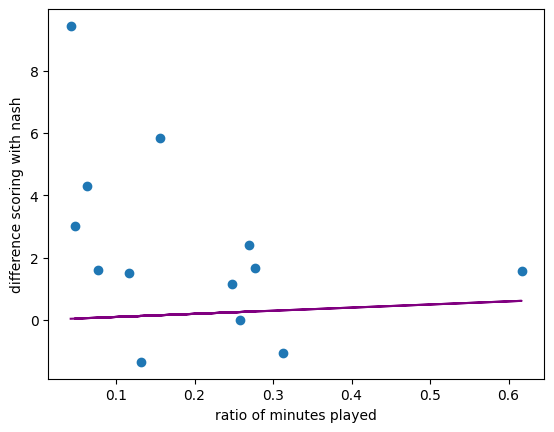

In [15]:
#try to do polycurve fitting, its really bad, too few points so everything is all noise

poly = PolynomialFeatures(degree=5, include_bias=False)

poly_features = poly.fit_transform(np.array(min_w).reshape(-1, 1))
plt.plot(min_w,DIF, 'o')
plt.xlabel("ratio of minutes played")
plt.ylabel("difference scoring with nash")
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, min_w)
predicted_dif = poly_reg_model.predict(poly_features)
plt.plot(min_w, predicted_dif, color='purple')
coefficient_of_dermination = r2_score(DIF, predicted_dif)
print("Goodness r^2 of model:", coefficient_of_dermination)

correlation: -0.30503273451349533
Goodness r^2 of model: 0.09304496912478055


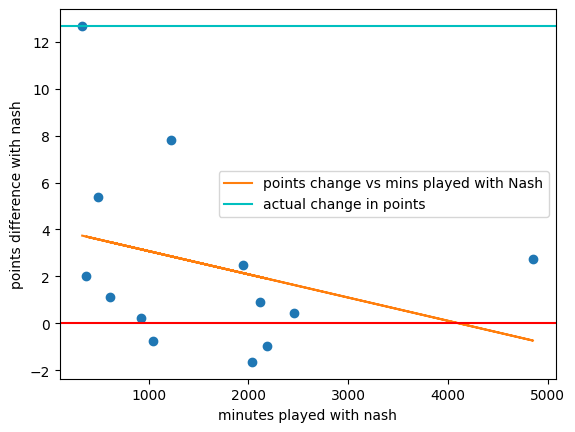

In [12]:
#ultimately I did find values of difference when Nash played vs when he didnt as a team stat and overall he made the team score a lot more points

nash_dif = data_merged["points difference"]
min1 = data_merged["mins with Nash"]
plt.plot(min1, nash_dif, 'o')
plt.xlabel("minutes played with nash")
plt.ylabel("points difference with nash")
slope, intercept, r, p, std_err = stats.linregress(min1, nash_dif)

def f(x):
  return slope * x + intercept

mymodel = list(map(f, min1))

coefficient_of_dermination = r2_score(nash_dif, mymodel)

plt.plot(min1, mymodel, label="points change vs mins played with Nash")

print("correlation:", r)
print("Goodness r^2 of model:", coefficient_of_dermination)
plt.axhline(0, c='r')
plt.axhline(12.65, label="actual change in points", c='c')
plt.legend(loc='center right')